In [1]:
# install the required libraries
!pip install scanpy
!pip install anndata
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 78.7 MB/s eta 0:00:00


## Data Import and Basic Exploration

In [2]:
## Data Import and Basic Exploration
# import core single-cell tools
import scanpy as sc
import anndata as ad

# import the data
!wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad

--2025-11-18 03:52:56--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-11-18 03:52:56--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  85.2MB/s    in 4.2s    

2025-11-18 03:53:01 (81.3 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/35450

In [3]:
# load the data into an anndata object
bone_marrow_adata = sc.read_h5ad('/content/bone_marrow.h5ad')

# display the data
print(bone_marrow_adata)

# display the dimensions of the dataset
bone_marrow_adata.shape

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


(14783, 17374)

In [4]:
# display metadata of cells (obs)
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [5]:
# display metadata of genes (var)
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [6]:
# display the annotated data as a data frame
bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Quality Control

In [7]:
# decrease name redundancy in cells and genes
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()

In [8]:
## contamination removal
# selection of contaminants (mitochondrial and ribosomal reads)
bone_marrow_adata.var['MT'] = bone_marrow_adata.var['feature_name'].str.startswith('MT-') # mitochondrial reads
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var['feature_name'].str.startswith('RPS', 'RPL') # ribosomal genes

# take a look at the mitochondrial genes
mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
print(mt_genes)

                 n_cells  feature_is_filtered feature_name feature_reference  \
ENSG00000228253     2270                False      MT-ATP8    NCBITaxon:9606   
ENSG00000198899    15626                False      MT-ATP6    NCBITaxon:9606   
ENSG00000198763    15561                False       MT-ND2    NCBITaxon:9606   
ENSG00000198886    15656                False       MT-ND4    NCBITaxon:9606   
ENSG00000198804    15656                False       MT-CO1    NCBITaxon:9606   
ENSG00000198695     4611                False       MT-ND6    NCBITaxon:9606   
ENSG00000212907     6575                False      MT-ND4L    NCBITaxon:9606   
ENSG00000198888    14520                False       MT-ND1    NCBITaxon:9606   
ENSG00000198712    15669                False       MT-CO2    NCBITaxon:9606   
ENSG00000198727    15393                False       MT-CYB    NCBITaxon:9606   
ENSG00000198938    15694                False       MT-CO3    NCBITaxon:9606   
ENSG00000198840    15386                

In [9]:
# display the ribosomal genes
ribo_genes = bone_marrow_adata.var[bone_marrow_adata.var['RIBO']]
print(ribo_genes)

                 n_cells  feature_is_filtered feature_name feature_reference  \
ENSG00000117676     2019                False      RPS6KA1    NCBITaxon:9606   
ENSG00000118181    14810                False        RPS25    NCBITaxon:9606   
ENSG00000198208       67                False      RPS6KL1    NCBITaxon:9606   
ENSG00000136643      310                False      RPS6KC1    NCBITaxon:9606   
ENSG00000145425    14792                False        RPS3A    NCBITaxon:9606   
ENSG00000138326    14982                False        RPS24    NCBITaxon:9606   
ENSG00000170889    14838                False         RPS9    NCBITaxon:9606   
ENSG00000255949       12                False  RPS6KB2-AS1    NCBITaxon:9606   
ENSG00000149273    15238                False         RPS3    NCBITaxon:9606   
ENSG00000177954    15382                False        RPS27    NCBITaxon:9606   
ENSG00000168028    13907                False         RPSA    NCBITaxon:9606   
ENSG00000231767       80                

In [10]:
# calculate the QC metrics
sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO'], inplace=True, log1p=True
)

In [11]:
# the QC metrics are now present in the data frame
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,5.229761,9.910657,18.420549,40.537370,138.356339,4.937034,1.154665,357.311005,5.881402,2.981970
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,7.532181,14.238965,26.142280,57.850376,113.859787,4.743712,1.350507,376.610626,5.933864,4.467032
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,7.871431,14.867313,27.103972,59.749640,125.068520,4.836825,1.543431,385.375214,5.956809,4.755794
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,7.115205,13.512491,25.060052,56.156243,103.474380,4.648942,1.182754,388.487671,5.964832,4.440570
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,13.202208,24.706561,45.388216,100.000121,138.531082,4.938287,2.870118,352.302429,5.867324,7.299080


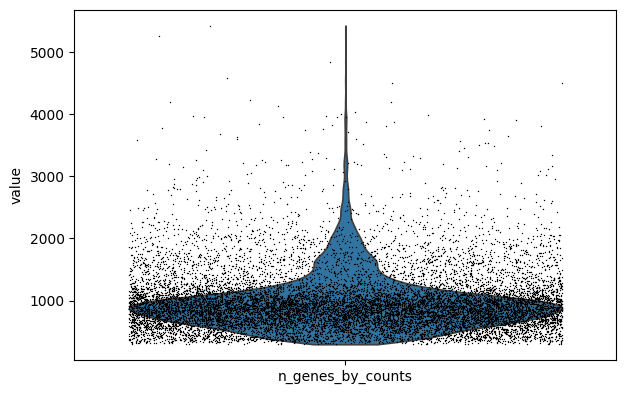

In [12]:
# visualize the number of genes expressed in each cell (n_genes_by_counts) as a violin plot
sc.pl.violin(bone_marrow_adata, ['n_genes_by_counts'], jitter = 0.4, multi_panel=False)

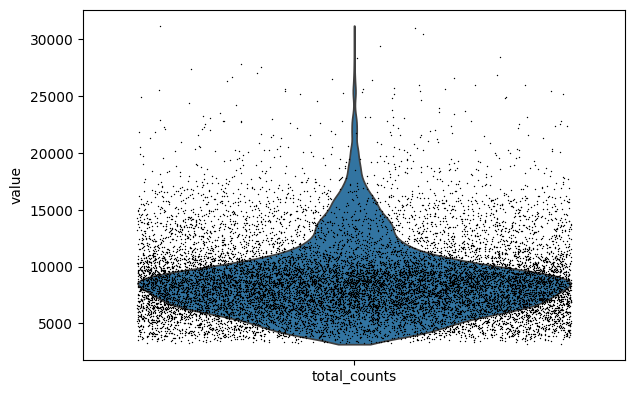

In [13]:
# visualize the total number of UMIs (molecules) detected in each cell
sc.pl.violin(bone_marrow_adata, ['total_counts'], jitter = 0.4, multi_panel=False)

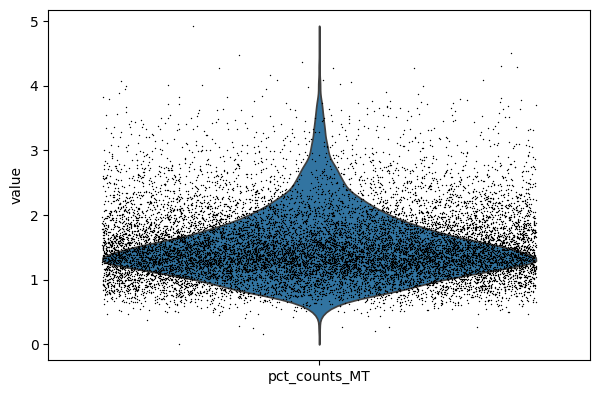

In [14]:
# violin plot of mitochondrial gene levels in each cell
sc.pl.violin(bone_marrow_adata, ['pct_counts_MT'], jitter = 0.4, multi_panel=False)

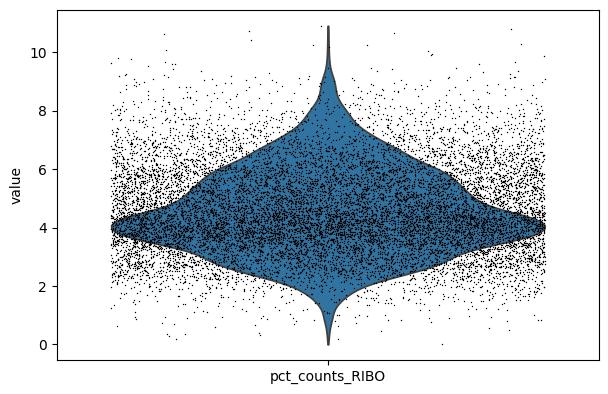

In [15]:
# violin plot of ribosomal gene levels in each cell
sc.pl.violin(bone_marrow_adata, ['pct_counts_RIBO'], jitter = 0.4, multi_panel=False)

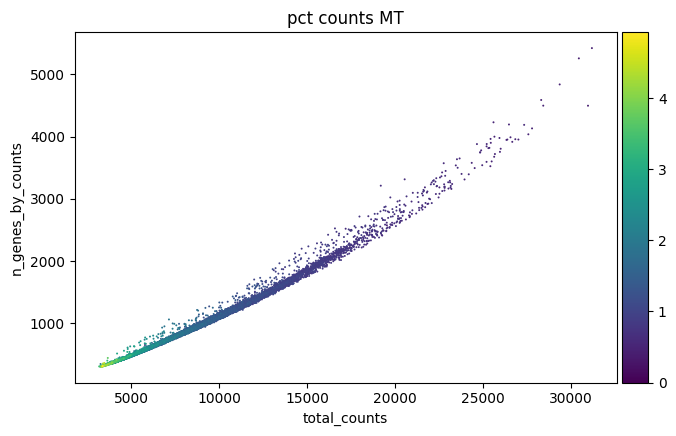

In [16]:
# scatter plot of total UMIs vs total genes per cell with colour mapping based on MT gene levels
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

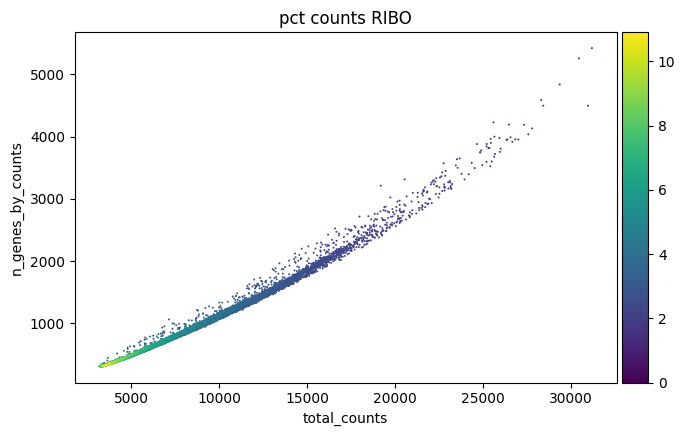

In [17]:
# scatter plot of total UMIs vs total genes per cell, with colour mapping based on RIBO gene levels
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [18]:
# filter the data based on the MT and RB plots
# remove cells with high expressions of MT or RIBO genes
bone_marrow_adata = bone_marrow_adata[
    bone_marrow_adata.obs['pct_counts_MT'] < 4
]

In [19]:
bone_marrow_adata = bone_marrow_adata[
    bone_marrow_adata.obs['pct_counts_RIBO'] < 10
]

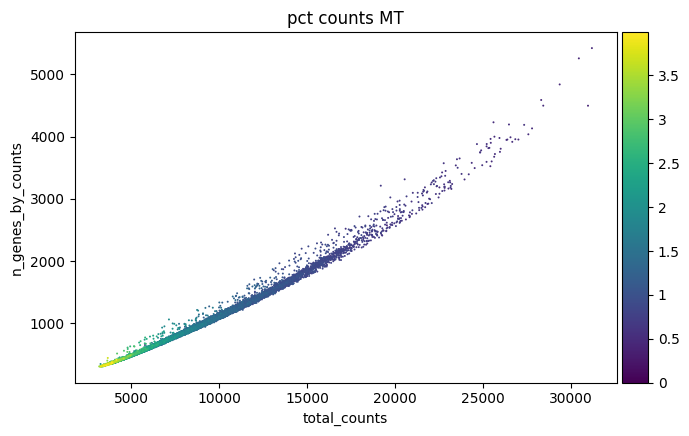

In [20]:
# plot the filtered data
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

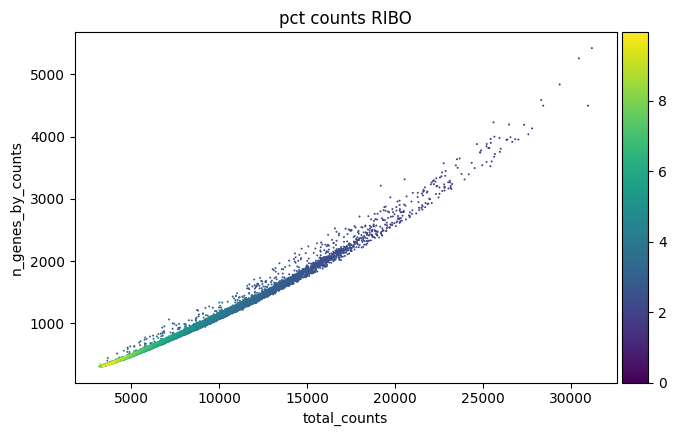

In [21]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [22]:
# detect and remove doublets
sc.pp.scrublet(bone_marrow_adata)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


## Normalization

In [23]:
## Normalization
# Save a copy of the data in a new layer
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [24]:
# normalize the data to median counts
sc.pp.normalize_total(bone_marrow_adata)

In [25]:
# log-transformation
sc.pp.log1p(bone_marrow_adata)

In [26]:
# select the top 1000 most variable genes
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)

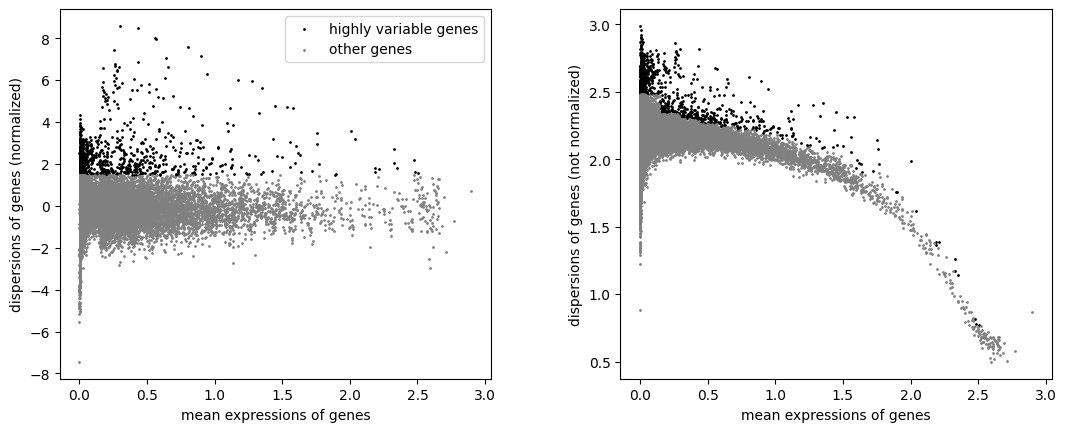

In [27]:
# plot the most variable genes
sc.pl.highly_variable_genes(bone_marrow_adata) # left = normalized, right = before normalization

## Dimensionality Reduction

In [28]:
# perform principal component analysis
sc.tl.pca(bone_marrow_adata)

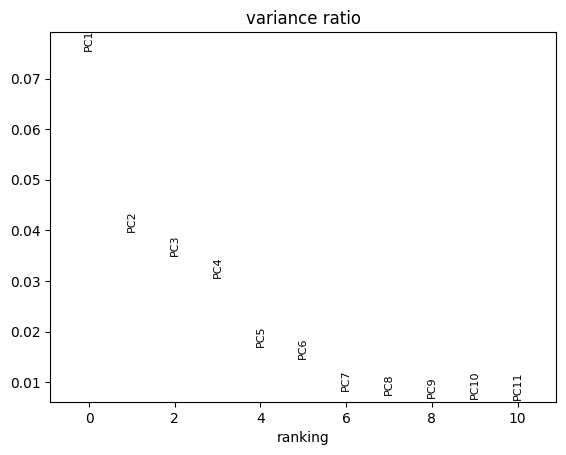

In [29]:
# display the variance ratios of the top 10 PCs
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log = False)

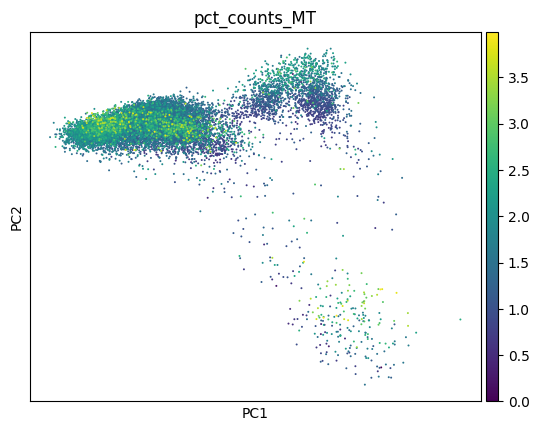

In [30]:
# visualize cells with clustering via the top 2 PCs
sc.pl.pca(bone_marrow_adata, color = ["pct_counts_MT"]) # color mapping from MT gene expression levels

In [31]:
# compute neighborhood graph of cells
sc.pp.neighbors(bone_marrow_adata)

In [32]:
# perform UMAP clustering
sc.tl.umap(bone_marrow_adata)

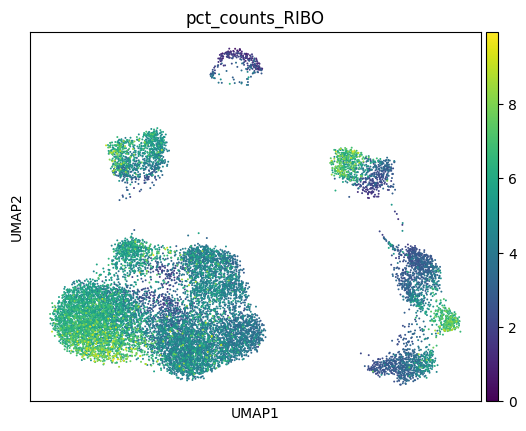

In [33]:
# visualize the UMAP clustering
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"], # color mapping based on RIBO gene expression levels
    size = 8
)

## Clustering

In [34]:
# perform clustering on the UMAP results using the Leiden algorithm and the igraph implementation
sc.tl.leiden(bone_marrow_adata, flavor = "igraph", n_iterations = 2)

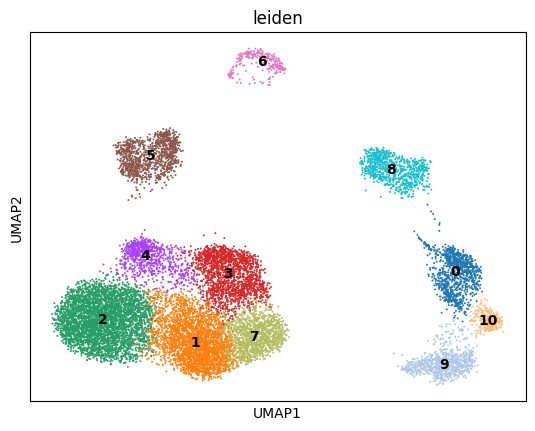

In [35]:
# visualize the clusters formed by the Leiden algorithm
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size = 8,
    legend_loc = "on data"
)

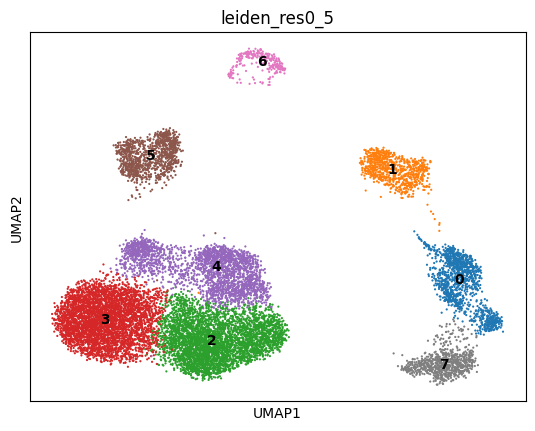

In [36]:
# perform Leiden clustering with 0.5 resolution
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution = 0.5)
# visualize clustering with 0.5 resolution
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    wspace=0.5,
    size=10,
    ncols = 1,
    legend_loc = "on data"
)


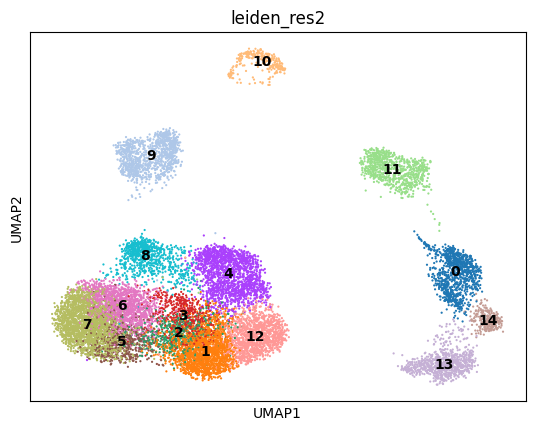

In [37]:
# perform Leiden clustering with 2 resolution
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution = 2)
# visualize clustering with 0.5 resolution
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res2"],
    wspace=0.5,
    size=10,
    ncols = 1,
    legend_loc = "on data"
)

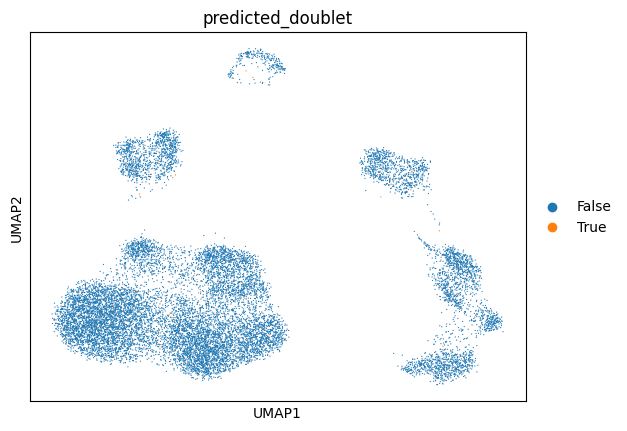

In [38]:
# finding possible doublets within the clusters
sc.pl.umap(
    bone_marrow_adata,
    color=['predicted_doublet'],
    wspace=0.5,
    size=3,
    ncols = 1
)

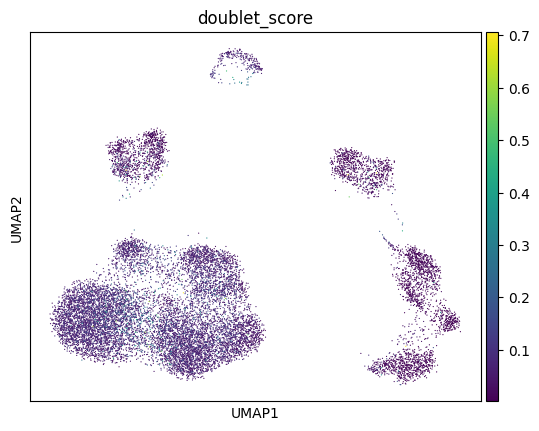

In [39]:
# finding possible doublets within the clusters based on doublet_score values
sc.pl.umap(
    bone_marrow_adata,
    color=['doublet_score'],
    wspace=0.5,
    size=3,
    ncols = 1
)

## Cell Annotation

In [40]:
# install the decoupler library
!pip install decoupler
import decoupler as dc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=d9a6b3053f7e3bef0874cbfbfb398304fb01a653763c8588782a8ca4a830efb8
  Stored in directory: /root/.cache/pip/wheels/d6/19/ee/0a6a1793d91c449563b49ccab57ce52da3e6fab7614836bd8c
Successfully built docrep
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [41]:
# obtain human dataset from PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# retain the canonical cell type markers
markers = markers[markers["canonical_marker"]]

# The original DataFrame has 'cell_type' and 'genesymbol' columns.
# We need to rename 'cell_type' to 'source' and 'genesymbol' to 'target'
# for compatibility with decoupler.
markers = markers.rename(columns={"cell_type":"source", "genesymbol":"target"})

# remove duplicated entries based on the new 'source' and 'target' columns
markers = markers[~markers.duplicated(["source", "target"])]

# Select only the 'source' and 'target' columns, which are required by decoupler
markers = markers[["source", "target"]]

In [42]:
# Map gene symbols in markers['target'] to ENSG IDs present in bone_marrow_adata.var_names
# First, create a mapping from gene symbol to ENSG ID from bone_marrow_adata.var
gene_symbol_to_ensg_map = {
    row['feature_name']: idx
    for idx, row in bone_marrow_adata.var.iterrows()
}

# Create a new column 'target_ensg' by mapping 'target' gene symbols to ENSG IDs
markers['target_ensg'] = markers['target'].map(gene_symbol_to_ensg_map)

# Remove markers that could not be mapped to an ENSG ID (i.e., gene not present in anndata)
markers_filtered = markers.dropna(subset=['target_ensg'])

# Replace the original 'target' column with the new 'target_ensg' column
markers_filtered = markers_filtered.drop(columns=['target']).rename(columns={'target_ensg': 'target'})

# load the gene expression matrix into decoupler with the filtered and remapped markers
dc.mt.ulm(data=bone_marrow_adata,
          net=markers_filtered,
          tmin=3)

In [43]:
# display the markers being used
markers_filtered.head()

,source,target
,,
2,Bergmann glia,ENSG00000175899
8,Pinealocytes,ENSG00000129673
9,Astrocytes,ENSG00000129673
10,Sertoli cells,ENSG00000205002
17,Platelets,ENSG00000167972


In [44]:
# retrieve the score for each cell type
score = dc.pp.get_obsm(bone_marrow_adata, key = "score_ulm") # adds "score_ulm" to bone_marrow_adata.obsm
score

AnnData object with n_obs × n_vars = 14753 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [45]:
# take a look at the score data
bone_marrow_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883327,0.016434,-0.592727,-0.662709,0.835844,0.855658,0.297497,1.485645,-0.306579,0.237966,...,-0.513300,-0.422879,1.642842,-0.004397,0.544274,0.413782,-0.543446,-0.513300,3.113955,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284211,-0.467915,-0.523161,1.583142,1.219294,0.157749,0.487832,-0.624411,1.770228,...,-0.405214,3.168114,-0.405214,0.462941,0.897839,0.897839,3.848090,-0.405214,-0.202416,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892458,-0.682415,-0.460709,-0.515104,1.573296,1.187885,1.656059,3.930773,1.925972,2.500043,...,-0.398974,1.170357,2.442550,-0.798166,0.925019,-0.651620,1.906383,2.286411,0.851589,-0.609517
Guo-AAACCTGAGCGATTCT-1,-0.922277,-0.772809,-0.476102,-0.532315,0.269859,1.180814,0.774439,4.512264,1.123885,1.731646,...,-0.412304,0.081088,2.299994,-0.824834,-0.673392,-0.673392,0.929763,-0.412304,1.709463,-0.629882
Guo-AAACCTGAGTGAAGAG-3,-0.643676,-0.510289,-0.332284,-0.371516,-0.621831,1.977704,0.019348,1.642938,2.016219,2.030027,...,-0.287758,2.170481,3.344464,1.184865,-0.469977,-0.469977,-0.761743,-0.287758,1.787137,-0.439610


In [46]:
# list all possible cell types (columns of score_ulm)
bone_marrow_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)

In [47]:
# rank genes
bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden", reference="rest", method="t-test_overestim_var")
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"]>0]
bone_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,93.242270,6.316474,0.0,0.0
1,0,rest,Macrophages,82.211698,5.870349,0.0,0.0
2,0,rest,Monocytes,74.747482,5.751373,0.0,0.0
3,0,rest,Dendritic cells,72.155297,5.269676,0.0,0.0
4,0,rest,Microglia,69.668796,4.137952,0.0,0.0


In [48]:
# annotate the clusters
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-3214879929.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [49]:
cluster_annotations

{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '2': 'Nuocytes',
 '3': 'NK cells',
 '4': 'Nuocytes',
 '5': 'B cells naive',
 '6': 'Platelets',
 '7': 'Gamma delta T cells',
 '8': 'Plasma cells',
 '9': 'Monocytes',
 '10': 'Neutrophils'}

In [50]:
# add cell annotation to the cell metadata (bone_marrow_adata.obs)
bone_marrow_adata.obs['cell_type_annotation'] = bone_marrow_adata.obs['leiden'].map(cluster_annotations)